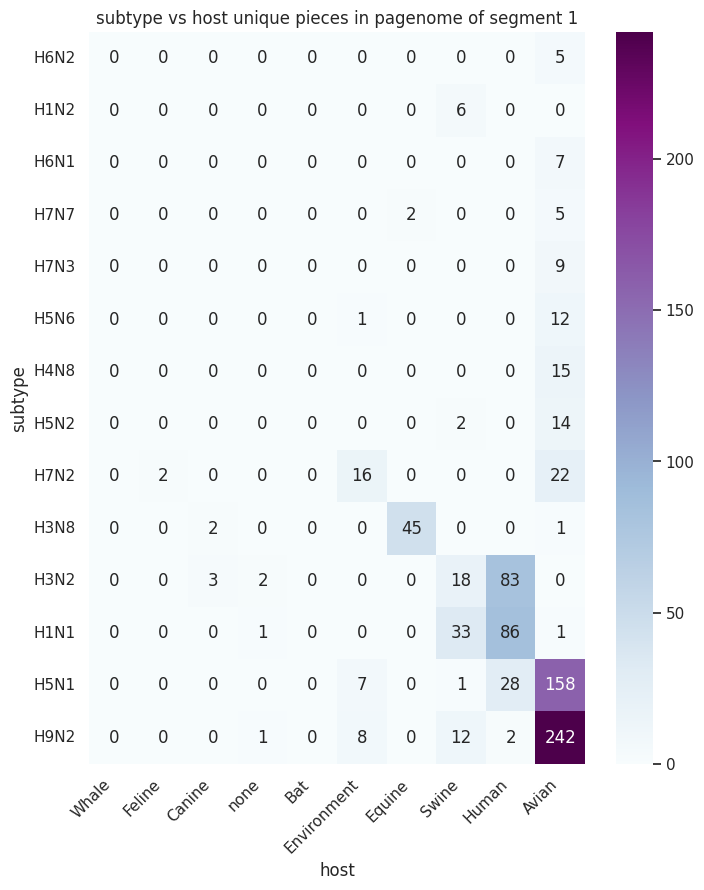

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(file_path, x_labels_file, y_labels_file, segment):
    matrix = np.loadtxt(file_path)
    backup = matrix.copy()

    #only show numbers in the heatmap with values of at  least 5.
    mask = np.any(backup > 4, axis=1)
    matrix = backup[mask]

    # make x axis using the labels file
    # the name of the labels file "X_host"
    with open(x_labels_file, 'r') as f:
        x_labels = f.read().splitlines()


    # make the  axis using labels file
    # name of the labels file is "Y_subtype"
    with open(y_labels_file, 'r') as f:
        y_labels = f.read().splitlines()
        y_labels = np.array(y_labels)
        y_labels = y_labels[mask]


    # create sns heatmap
    sns.set()
    plt.figure(figsize=(8, 9.5))
    heatmap = sns.heatmap(matrix, annot=True, fmt=".0f", cmap="BuPu")
    heatmap.set_xticklabels(x_labels, rotation=45, ha='right')
    heatmap.set_yticklabels(y_labels, rotation=0, ha='right')

    plt.xlabel("host")
    plt.ylabel("subtype")
    plt.title("subtype vs host unique pieces in pagenome of segment "+segment)
    plt.show()

seg = "1"
file_path = seg+".res"
x_labels_file = seg+".host"
y_labels_file = seg+".subtype"
heatmap(file_path, x_labels_file, y_labels_file, seg)